## Import

In [42]:
from matplotlib import pyplot as plt

import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf

from keras.callbacks import History
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GRU, Bidirectional
from tensorflow.keras.optimizers import SGD, Adam

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers


from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score

import sklearn.metrics as metrics

sns.color_palette("viridis")

import warnings
warnings.filterwarnings('ignore')

In [43]:
data = pd.read_csv("cocacola.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200
...,...,...,...,...,...,...,...
15091,2021-12-13,56.980000,57.930000,56.959999,57.759998,57.759998,31362800
15092,2021-12-14,57.400002,58.169998,57.400002,57.799999,57.799999,24806600
15093,2021-12-15,57.930000,58.250000,57.650002,58.060001,58.060001,24923800
15094,2021-12-16,57.980000,58.880001,57.900002,58.650002,58.650002,24696900


In [44]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)

In [45]:
data.index = data.pop('Date')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200
...,...,...,...,...,...,...
2021-12-13,56.980000,57.930000,56.959999,57.759998,57.759998,31362800
2021-12-14,57.400002,58.169998,57.400002,57.799999,57.799999,24806600
2021-12-15,57.930000,58.250000,57.650002,58.060001,58.060001,24923800


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15096 entries, 1962-01-02 to 2021-12-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       15096 non-null  float64
 1   High       15096 non-null  float64
 2   Low        15096 non-null  float64
 3   Close      15096 non-null  float64
 4   Adj Close  15096 non-null  float64
 5   Volume     15096 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 825.6 KB


In [47]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,15096.000000,15096.000000,15096.000000,15096.000000,15096.000000,1.509600e+04
mean,16.056202,16.188428,15.921876,16.060734,11.367487,9.032904e+06
std,16.939301,17.064336,16.811753,16.941712,14.253637,7.935744e+06
min,0.192708,0.193359,0.182292,0.192057,0.037855,7.680000e+04
25%,0.860677,0.869792,0.854167,0.860352,0.242312,2.812800e+06
50%,9.328125,9.398438,9.218750,9.351562,4.642848,7.585200e+06
75%,28.875000,29.167500,28.563125,28.901562,17.251080,1.291275e+07
max,59.810001,60.130001,59.619999,60.130001,58.650002,1.241690e+08


In [48]:
nan_count = data.isnull().sum().sort_values()
print(nan_count)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [49]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

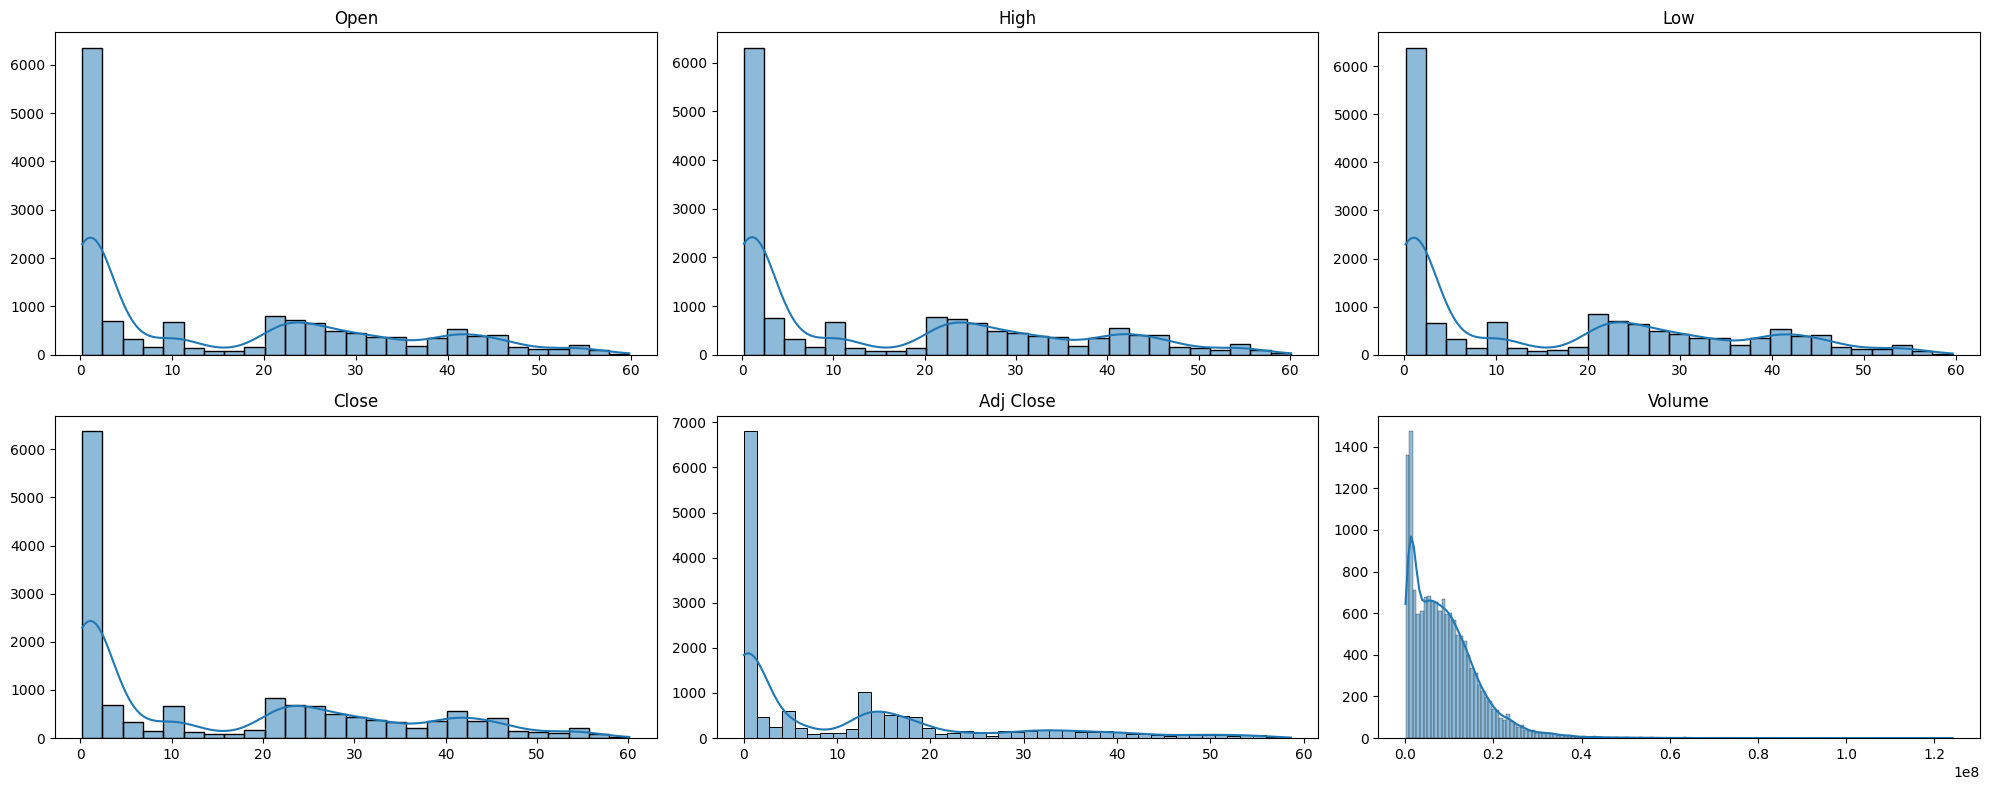

In [50]:
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

fig, axes = plt.subplots(2, 3, figsize=(20, 8))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.histplot(x=column_name, data=data, ax=axes[i], kde=True)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()

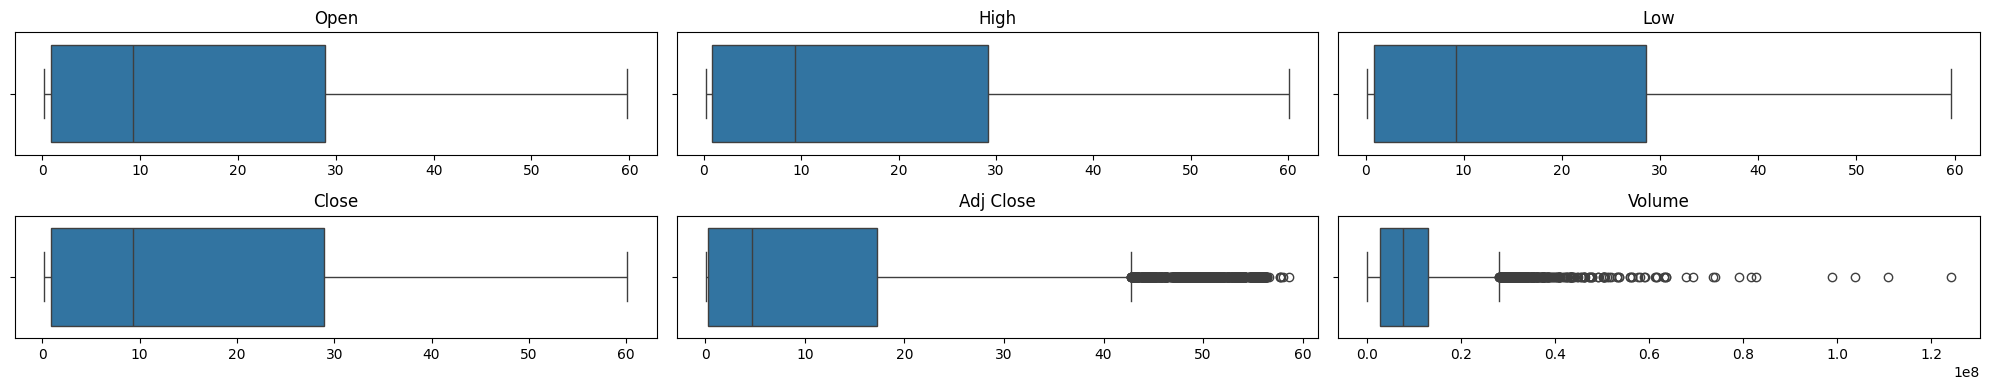

In [51]:
fig, axes = plt.subplots(2, 3, figsize=(20, 4))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.boxplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [52]:
def plot(data, columns, x):
    fig, axes = plt.subplots(3, 2, figsize=(20, 8))
    axes = axes.flatten()
    for i, column_name in enumerate(columns):
        sns.lineplot(x=x, y=column_name, data=data, ax=axes[i])
        axes[i].set_title(column_name)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
    plt.tight_layout()
    plt.show()

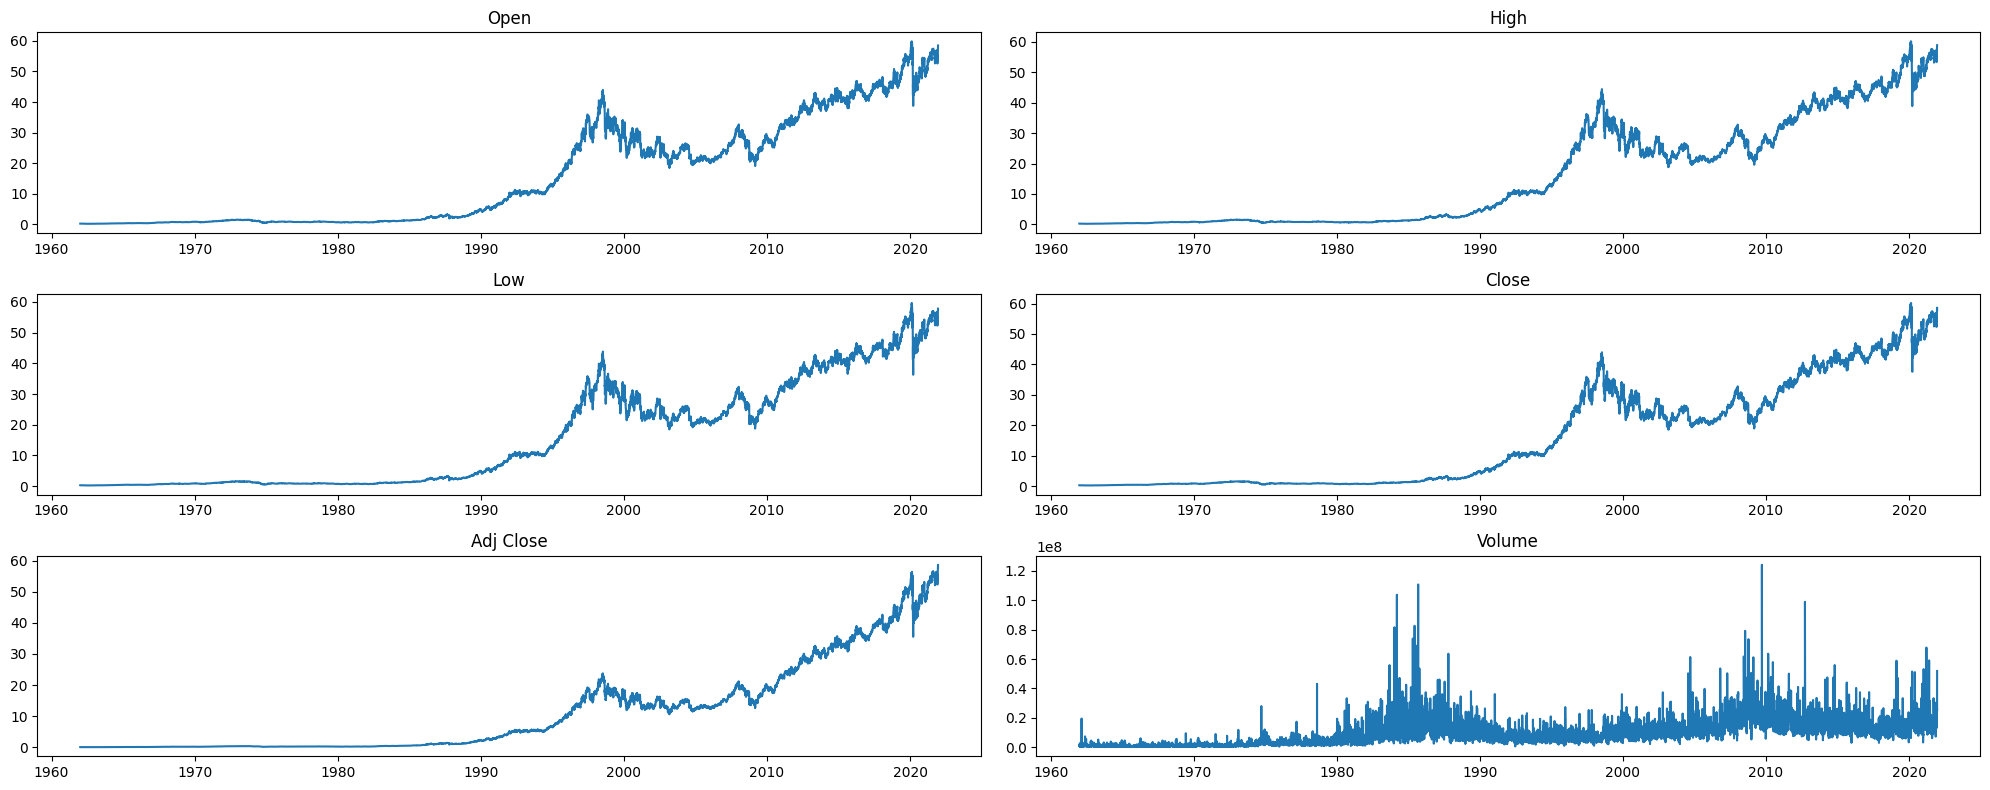

In [53]:
plot(data, columns, 'Date')

In [54]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200


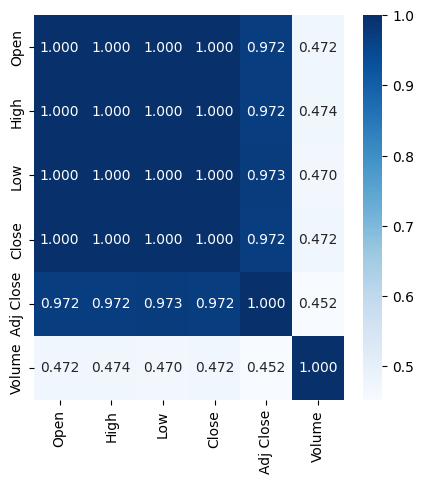

In [55]:
df_corr = data.corr()
plt.figure(figsize = (5,5))
sns.heatmap(data=df_corr, annot=True,cmap='Blues',fmt='.3f')
plt.show()

Podela podataka na train, val i test skup (70%, 20%, 10%).

In [56]:
data = data.drop(columns=['High', 'Low', 'Close', 'Adj Close', 'Volume'])

In [57]:
column_indices = {name: i for i, name in enumerate(data.columns)}

n = len(data)
train_df = data[0:int(n*0.7)]
val_df = data[int(n*0.7):int(n*0.9)]
test_df = data[int(n*0.9):]

print("Train size : ", train_df.shape, "\n"
      "Validation size : ", val_df.shape, "\n"
      "Test Size : ", test_df.shape)

train_df

Train size :  (10567, 1) 
Validation size :  (3019, 1) 
Test Size :  (1510, 1)


,Open
Date,
1962-01-02,0.263021
1962-01-03,0.259115
1962-01-04,0.257813
1962-01-05,0.259115
1962-01-08,0.251302
...,...
2003-12-16,24.985001
2003-12-17,25.275000
2003-12-18,24.985001


In [58]:
train_df.columns

Index(['Open'], dtype='object')

Normalizacija podataka

In [59]:
scaler = MinMaxScaler()

col = ['Open']

train_df[col] = scaler.fit_transform(train_df[col])
val_df[col] = scaler.transform(val_df[col])
test_df[col] = scaler.transform(test_df[col])


In [60]:
target = ['Open']

def split_into_windows(data, window_size, step_size):
    X, Y = [], []
    for i in range(0, len(data) - window_size, step_size):
        X.append(data.iloc[i:i+window_size])
        Y.append(data.iloc[i+window_size][target])
    return np.array(X), np.array(Y)

In [61]:
X_train, Y_train = split_into_windows(train_df.astype(np.float32), 11, 1)
X_val, Y_val = split_into_windows(val_df.astype(np.float32), 11, 1)
X_test, Y_test = split_into_windows(test_df.astype(np.float32), 11, 1)

In [62]:
print("Train size : ", X_train.shape, Y_train.shape,"\n",
      "Val size : ", X_val.shape, Y_val.shape,"\n",
      "Test Size : ", X_test.shape, Y_train.shape)

Train size :  (10556, 11, 1) (10556, 1) 
 Val size :  (3008, 11, 1) (3008, 1) 
 Test Size :  (1499, 11, 1) (10556, 1)


pomocne funkcije

In [63]:
results = pd.DataFrame(columns=['Model', 'mean abs', 'R2', 'mean sqrd'])


In [64]:

def print_result(model, model_name, X_test, y_test, end=-1):

    y_pred = model.predict(X_test)

    mean_abs = metrics.mean_absolute_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    mean_sqrd = metrics.mean_squared_error(y_test, y_pred)

    results.loc[len(results)] = [model_name, mean_abs, r2, mean_sqrd]

    # fig, axs = plt.subplots(4, 2, figsize=(12, 12)) 

    # for k in range(0,8):
    #     i = k // 2 
    #     j = k % 2   
        
    #     axs[i, j].plot(y_test[:, k], label='True')   
    #     axs[i, j].plot(y_pred[:, k], label='Predicted') 
    #     axs[i, j].set_xlabel(data.columns[k])  
    #     axs[i, j].legend()

    plt.plot(y_test, label='True')   
    plt.plot(y_pred, label='Predicted') 
    plt.tight_layout()  
    plt.show()


    display(results)



In [65]:

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)


Modeli


In [66]:
history = History()
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model's Training & Validation loss across epochs")
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

# SimpleRNN

Epoch 1/11


330/330 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0798 - mean_absolute_error: 0.2490 - root_mean_squared_error: 0.2761 - val_loss: 0.0127 - val_mean_absolute_error: 0.0901 - val_root_mean_squared_error: 0.1128
Epoch 2/11
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0048 - mean_absolute_error: 0.0618 - root_mean_squared_error: 0.0689 - val_loss: 0.0112 - val_mean_absolute_error: 0.0870 - val_root_mean_squared_error: 0.1059
Epoch 3/11
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0484 - root_mean_squared_error: 0.0553 - val_loss: 0.0114 - val_mean_absolute_error: 0.0867 - val_root_mean_squared_error: 0.1068
Epoch 4/11
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0024 - mean_absolute_error: 0.0413 - root_mean_squared_error: 0.0487 - val_loss: 0.0108 - val_mean_absolute_error: 0.0834 - val_root_mean_squared_error: 0.1040
Epoch 5/11
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0378 - root_mean_squared_error:

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 11, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 11, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 11, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, 11, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_7 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,604 (139.08 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,803 (69.55 KB)

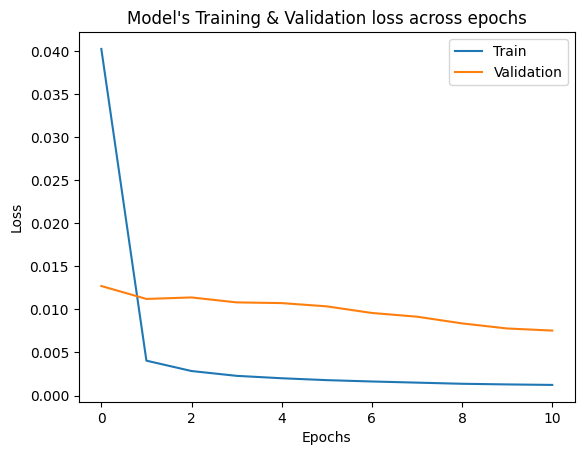

In [67]:

model = Sequential()
# adding RNN layers and dropout regularization 
model.add(SimpleRNN(units = 50, activation = "relu",input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 50,  activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50, activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50))
# adding the output layer
model.add(Dense(units = len(target), activation='sigmoid')) 
# compiling RNN
model.compile(optimizer = SGD(learning_rate=0.001,decay=1e-6,  momentum=0.9, nesterov=True), metrics = ["mean_absolute_error", tf.metrics.RootMeanSquaredError()],loss = "mean_squared_error")

history = model.fit(X_train,Y_train, 
                    validation_data=(X_val, Y_val), 
                    epochs = 11, batch_size = 32,
                    callbacks=[ history, early_stopping]
                    )
model.summary()
plotloss(history)


In [68]:
# model.evaluate(X_test,Y_test)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


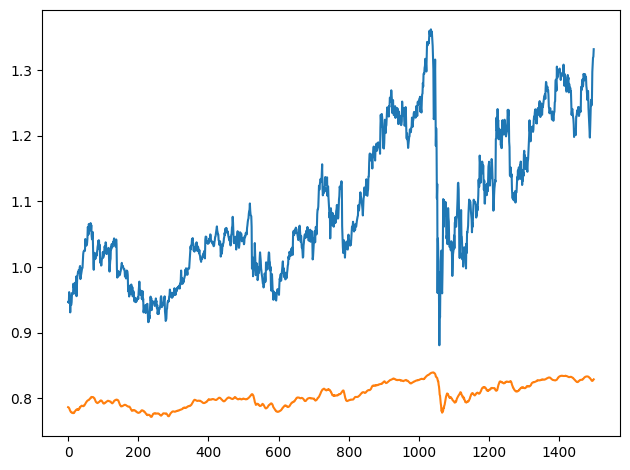

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 4 units 50, SGD 0.001, LOSS mean_squ...",0.28669,-6.758153,0.090577


In [69]:
print_result(model, 'SimpleRNN 4 units 50, SGD 0.001, LOSS mean_squared_error', X_test, Y_test, 200)

# LSTM

LSTM 50 50 D25, 8

In [70]:


model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'],
             )

model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])



Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0415 - val_loss: 6.4089e-04 - val_mean_absolute_error: 0.0198
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.5298e-04 - mean_absolute_error: 0.0061 - val_loss: 1.9620e-04 - val_mean_absolute_error: 0.0104
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.6632e-04 - mean_absolute_error: 0.0066 - val_loss: 3.0234e-04 - val_mean_absolute_error: 0.0134
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.2864e-04 - mean_absolute_error: 0.0059 - val_loss: 2.0315e-04 - val_mean_absolute_error: 0.0111
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.2003e-04 - mean_absolute_error: 0.0057 - val_loss: 1.4938e-04 - val_mean_absolute_error: 0.0090
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.1577e-04 - mean_absolute_error: 0.0056 - val_loss: 2.3481e-04 - val_mean_absolute_error: 0.0118
Epoch 7/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - lo

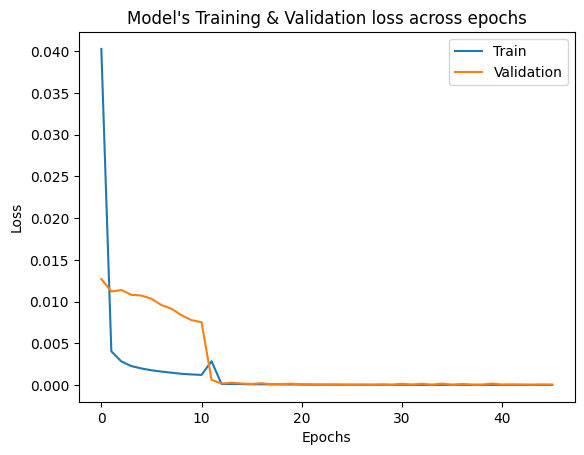

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


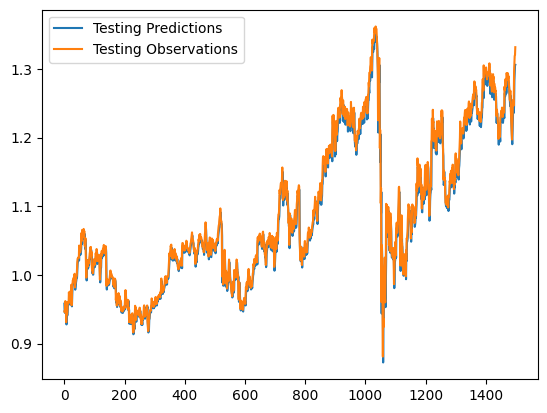

In [71]:
plotloss(history)

test_predictions = model.predict(X_test)

plt.plot(test_predictions)
plt.plot( Y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0069 - mean_absolute_error: 0.0315 - mean_squared_error: 0.0069 - val_loss: 4.7705e-04 - val_mean_absolute_error: 0.0169 - val_mean_squared_error: 4.7705e-04
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 1.5467e-04 - mean_absolute_error: 0.0062 - mean_squared_error: 1.5467e-04 - val_loss: 2.5053e-04 - val_mean_absolute_error: 0.0120 - val_mean_squared_error: 2.5053e-04
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 1.4722e-04 - mean_absolute_error: 0.0063 - mean_squared_error: 1.4722e-04 - val_loss: 4.2241e-04 - val_mean_absolute_error: 0.0170 - val_mean_squared_error: 4.2241e-04
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.4430e-04 - mean_absolute_error: 0.0063 - mean_squared_error: 1.4430e-04 - val_loss: 3.4213e-04 - val_mean_absolute_error: 0.0150 - val_mean_squared_error: 3.4213e-04
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.3845e-04 - mean_absolute_erro

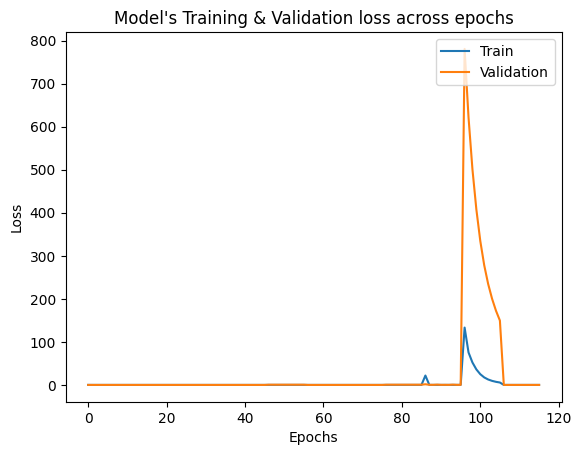

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


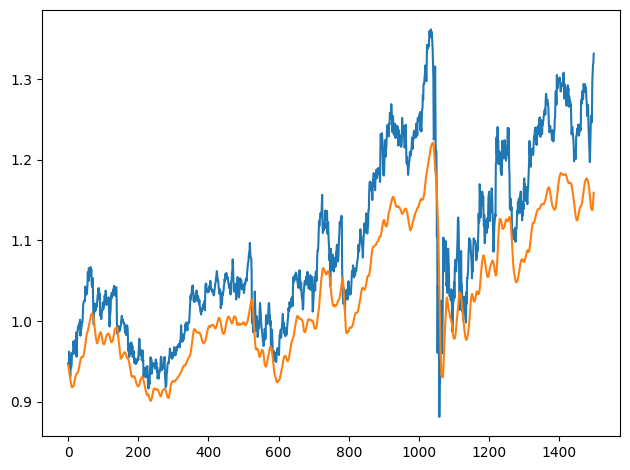

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 4 units 50, SGD 0.001, LOSS mean_squ...",0.286690,-6.758153,0.090577
1,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001, LO...",1.091760,-102.092452,1.203614
2,"LSTM 32, 16, , Adam 0.001, LOSS mean_squared_...",0.073787,0.403977,0.006959
3,"4 LSTM 50, Drop 0.2, Adam 0.001, LOSS mean_sq...",0.060292,0.502265,0.005811
4,"GRU L 4 units 50, Adam 0.001, LOSS mean_square...",1.091760,-102.092452,1.203614
5,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001, LO...",0.062457,0.572830,0.004987


In [97]:
regressorLSTM = tf.keras.Sequential()
regressorLSTM.add(LSTM(50, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
regressorLSTM.add(LSTM(50, return_sequences = False))
regressorLSTM.add(Dense(25, activation="relu"))
regressorLSTM.add(Dense(len(target),activation="relu"))
regressorLSTM.compile(optimizer = Adam(learning_rate=0.001),loss = 'mean_squared_error',metrics = ["mean_absolute_error",'mean_squared_error'])
regressorLSTM.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=50,batch_size=32, callbacks=[history, early_stopping])

plotloss(history)
print_result(regressorLSTM, 'LSTM 2 units 50, Dense 2 25,1,  Adam 0.001, LOSS mean_squared_error', X_test, Y_test)


In [73]:

regressorLSTM.summary()
result = regressorLSTM.evaluate(X_test,Y_test)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 11, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0610 - mean_absolute_error: 1.0271 - mean_squared_error: 1.0610


LSTM 32,16 D8

In [75]:

regressorLSTM = tf.keras.Sequential()
regressorLSTM.add(LSTM(32, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
regressorLSTM.add(LSTM(16, return_sequences = False))

regressorLSTM.add(Dense(len(target),activation="relu"))
regressorLSTM.compile(optimizer = Adam(learning_rate=0.001),loss = 'mean_squared_error',metrics = ["mean_absolute_error",'mean_squared_error'])
regressorLSTM.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=64, callbacks=[history, early_stopping])
regressorLSTM.summary()


Epoch 1/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0152 - mean_absolute_error: 0.0607 - mean_squared_error: 0.0152 - val_loss: 4.6245e-04 - val_mean_absolute_error: 0.0158 - val_mean_squared_error: 4.6245e-04
Epoch 2/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.5931e-04 - mean_absolute_error: 0.0061 - mean_squared_error: 1.5931e-04 - val_loss: 5.9179e-04 - val_mean_absolute_error: 0.0182 - val_mean_squared_error: 5.9179e-04
Epoch 3/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.4768e-04 - mean_absolute_error: 0.0058 - mean_squared_error: 1.4768e-04 - val_loss: 6.8085e-04 - val_mean_absolute_error: 0.0199 - val_mean_squared_error: 6.8085e-04
Epoch 4/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.5322e-04 - mean_absolute_error: 0.0060 - mean_squared_error: 1.5322e-04 - val_loss: 3.5418e-04 - val_mean_absolute_error: 0.0140 - val_mean_squared_error: 3.5418e-04
Epoch 5/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.3746e-04 - mean_absolute_err

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 11, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,517 (87.96 KB)

 Trainable params: 7,505 (29.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,012 (58.64 KB)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0037 - mean_absolute_error: 0.0540 - mean_squared_error: 0.0037


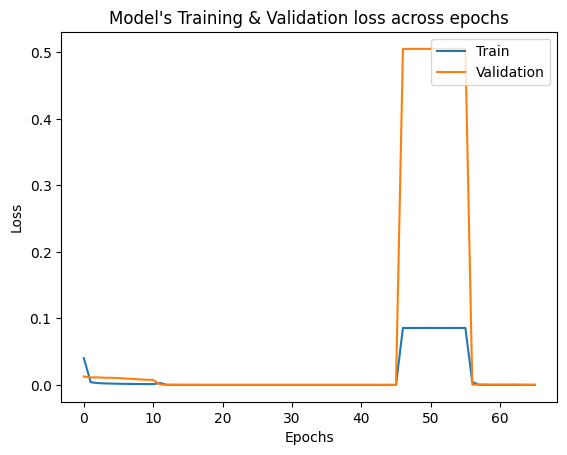

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


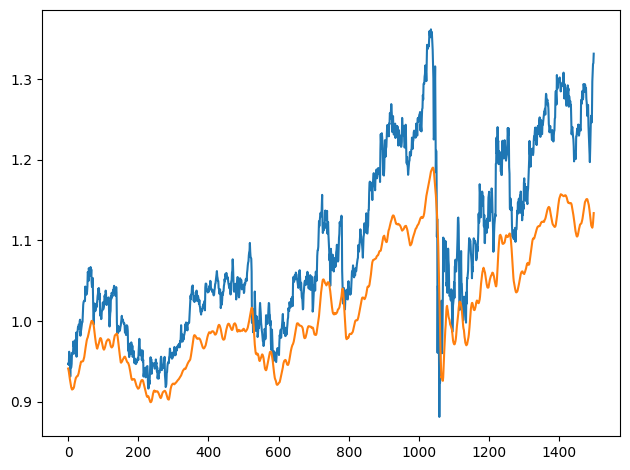

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 4 units 50, SGD 0.001, LOSS mean_squ...",0.286690,-6.758153,0.090577
1,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001, LO...",1.091760,-102.092452,1.203614
2,"LSTM 32, 16, , Adam 0.001, LOSS mean_squared_...",0.073787,0.403977,0.006959


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


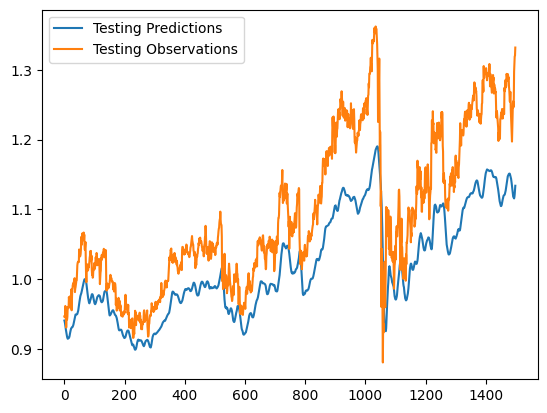

In [76]:
result = regressorLSTM.evaluate(X_test,Y_test)
plotloss(history)
print_result(regressorLSTM, 'LSTM 32, 16, ,  Adam 0.001, LOSS mean_squared_error', X_test, Y_test)

test_predictions = regressorLSTM.predict(X_test)
plt.plot(test_predictions)
plt.plot( Y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])


LSTM 50 D0.2, LSTM 3x50

In [77]:
regressorLSTM = Sequential()
regressorLSTM.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorLSTM.add(Dropout(0.2))
regressorLSTM.add(LSTM(units=50,return_sequences=True,activation='tanh'))
regressorLSTM.add(LSTM(units=50,return_sequences=True, activation='tanh'))
regressorLSTM.add(LSTM(units=50,activation='tanh'))
regressorLSTM.add(Dense(units=len(target),activation='relu'))
regressorLSTM.compile(optimizer=Adam(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorLSTM.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=64, callbacks=[history, early_stopping])
regressorLSTM.summary()

Epoch 1/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 0.0148 - mean_absolute_error: 0.0582 - val_loss: 0.0010 - val_mean_absolute_error: 0.0274
Epoch 2/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 3.1408e-04 - mean_absolute_error: 0.0085 - val_loss: 9.3623e-04 - val_mean_absolute_error: 0.0224
Epoch 3/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 2.9303e-04 - mean_absolute_error: 0.0083 - val_loss: 5.7553e-04 - val_mean_absolute_error: 0.0197
Epoch 4/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 2.7341e-04 - mean_absolute_error: 0.0081 - val_loss: 7.1284e-04 - val_mean_absolute_error: 0.0199
Epoch 5/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 3.1771e-04 - mean_absolute_error: 0.0090 - val_loss: 0.0018 - val_mean_absolute_error: 0.0334
Epoch 6/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 2.7135e-04 - mean_absolute_error: 0.0081 - val_loss: 4.0966e-04 - val_mean_absolute_error: 0.0159
Epoch 7/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/ste

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 11, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 11, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 11, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 11, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,155 (832.64 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,104 (555.10 KB)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0023 - mean_absolute_error: 0.0354   


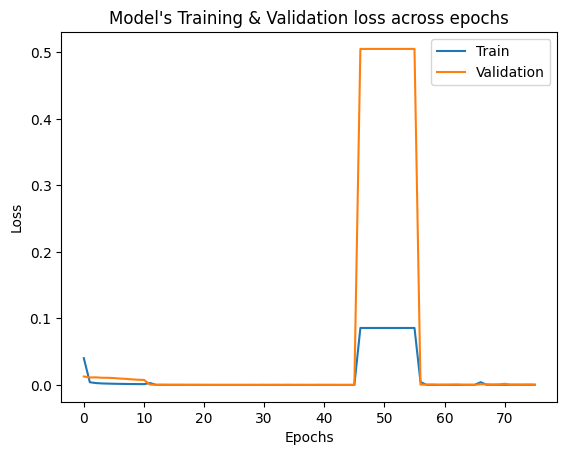

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


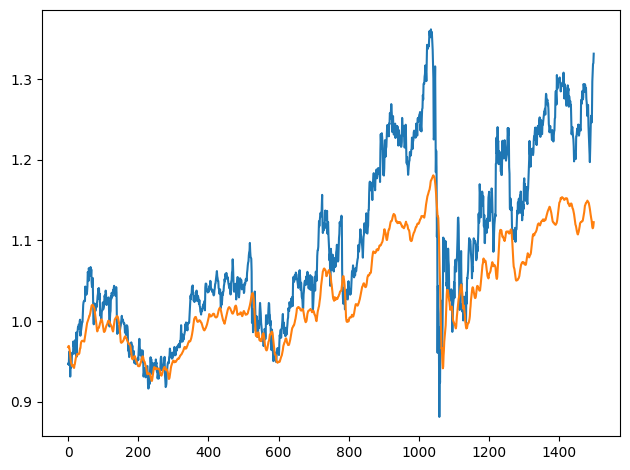

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 4 units 50, SGD 0.001, LOSS mean_squ...",0.286690,-6.758153,0.090577
1,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001, LO...",1.091760,-102.092452,1.203614
2,"LSTM 32, 16, , Adam 0.001, LOSS mean_squared_...",0.073787,0.403977,0.006959
3,"4 LSTM 50, Drop 0.2, Adam 0.001, LOSS mean_sq...",0.060292,0.502265,0.005811


In [78]:
result = regressorLSTM.evaluate(X_test,Y_test)
plotloss(history)
print_result(regressorLSTM, '4 LSTM 50, Drop 0.2,  Adam 0.001, LOSS mean_squared_error', X_test, Y_test)


# GRU

In [99]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(GRU(units=50,return_sequences=True,activation='tanh'))
regressorGRU.add(GRU(units=50,return_sequences=True, activation='tanh'))
regressorGRU.add(GRU(units=50,activation='tanh'))
regressorGRU.add(Dense(units=len(target),activation='relu'))
regressorGRU.compile(optimizer=Adam(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=64, callbacks=[history, early_stopping])
regressorGRU.summary()


Epoch 1/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0475 - val_loss: 4.4782e-04 - val_mean_absolute_error: 0.0158
Epoch 2/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.1894e-04 - mean_absolute_error: 0.0073 - val_loss: 3.0038e-04 - val_mean_absolute_error: 0.0138
Epoch 3/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 2.4910e-04 - mean_absolute_error: 0.0086 - val_loss: 6.2535e-04 - val_mean_absolute_error: 0.0219
Epoch 4/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 2.2870e-04 - mean_absolute_error: 0.0082 - val_loss: 2.4619e-04 - val_mean_absolute_error: 0.0118
Epoch 5/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 1.9206e-04 - mean_absolute_error: 0.0077 - val_loss: 3.2925e-04 - val_mean_absolute_error: 0.0141
Epoch 6/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 1.6423e-04 - mean_absolute_error: 0.0071 - val_loss: 4.3088e-04 - val_mean_absolute_error: 0.0168
Epoch 7/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_8 (GRU)                     │ (None, 11, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 11, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_9 (GRU)                     │ (None, 11, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_10 (GRU)                    │ (None, 11, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_11 (GRU)                    │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,705 (631.66 KB)

 Trainable params: 53,901 (210.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 107,804 (421.11 KB)

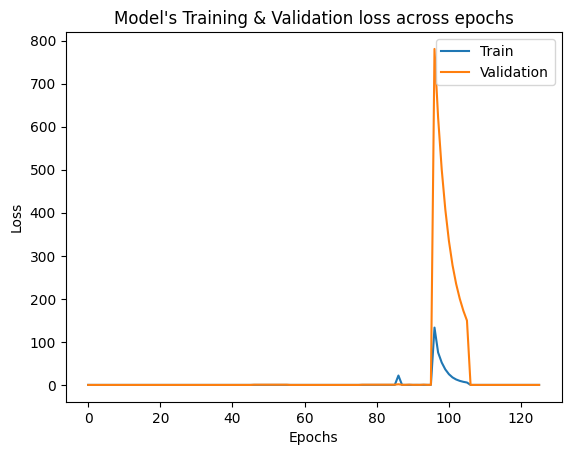

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


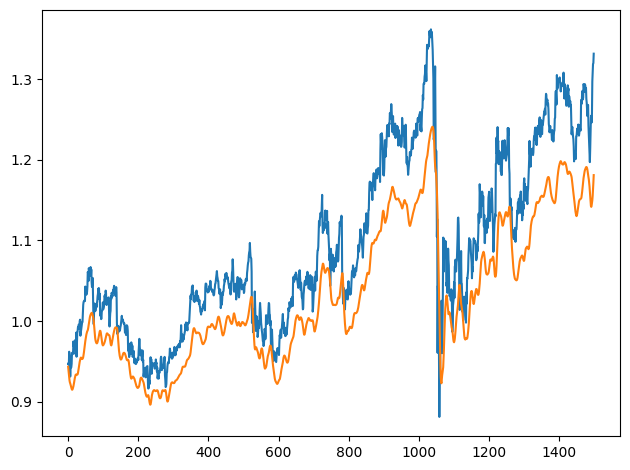

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 4 units 50, SGD 0.001, LOSS mean_squ...",0.286690,-6.758153,0.090577
1,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001, LO...",1.091760,-102.092452,1.203614
2,"LSTM 32, 16, , Adam 0.001, LOSS mean_squared_...",0.073787,0.403977,0.006959
3,"4 LSTM 50, Drop 0.2, Adam 0.001, LOSS mean_sq...",0.060292,0.502265,0.005811
4,"GRU L 4 units 50, Adam 0.001, LOSS mean_square...",1.091760,-102.092452,1.203614
5,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001, LO...",0.062457,0.572830,0.004987
6,"GRU L 4 units 50, Adam 0.001, LOSS mean_square...",1.091760,-102.092452,1.203614
7,"GRU L 4 units 50, Adam 0.001, LOSS mean_square...",0.059280,0.630744,0.004311


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0464


In [100]:

plotloss(history)

print_result(regressorGRU, 'GRU L 4 units 50, Adam 0.001, LOSS mean_squared_error', X_test, Y_test)

result = regressorGRU.evaluate(X_test,Y_test)

In [82]:
# optimizer=tf.optimizers.Adamax(learning_rate=0.001),
# metrics=[tf.metrics.RootMeanSquaredError()]

# Result

In [101]:
results

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 4 units 50, SGD 0.001, LOSS mean_squ...",0.286690,-6.758153,0.090577
1,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001, LO...",1.091760,-102.092452,1.203614
2,"LSTM 32, 16, , Adam 0.001, LOSS mean_squared_...",0.073787,0.403977,0.006959
3,"4 LSTM 50, Drop 0.2, Adam 0.001, LOSS mean_sq...",0.060292,0.502265,0.005811
4,"GRU L 4 units 50, Adam 0.001, LOSS mean_square...",1.091760,-102.092452,1.203614
5,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001, LO...",0.062457,0.572830,0.004987
6,"GRU L 4 units 50, Adam 0.001, LOSS mean_square...",1.091760,-102.092452,1.203614
7,"GRU L 4 units 50, Adam 0.001, LOSS mean_square...",0.059280,0.630744,0.004311


# drugi nacin

In [84]:
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)


datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [85]:
data

,Open
Date,
1962-01-02,0.263021
1962-01-03,0.259115
1962-01-04,0.257813
1962-01-05,0.259115
1962-01-08,0.251302
...,...
2021-12-13,56.980000
2021-12-14,57.400002
2021-12-15,57.930000


In [86]:
data2 = data.copy()
data2

,Open
Date,
1962-01-02,0.263021
1962-01-03,0.259115
1962-01-04,0.257813
1962-01-05,0.259115
1962-01-08,0.251302
...,...
2021-12-13,56.980000
2021-12-14,57.400002
2021-12-15,57.930000


In [87]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Open'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(data, 
                                '1962-01-05', 
                                '2021-12-17', 
                                n=3)

windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,1962-01-05,0.263021,0.259115,0.257813,0.259115
1,1962-01-08,0.259115,0.257813,0.259115,0.251302
2,1962-01-09,0.257813,0.259115,0.251302,0.250651
3,1962-01-10,0.259115,0.251302,0.250651,0.255208
4,1962-01-11,0.251302,0.250651,0.255208,0.256510
...,...,...,...,...,...
15088,2021-12-13,55.119999,54.750000,55.250000,56.980000
15089,2021-12-14,54.750000,55.250000,56.980000,57.400002
15090,2021-12-15,55.250000,56.980000,57.400002,57.930000
15091,2021-12-16,56.980000,57.400002,57.930000,57.980000


In [88]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((15093,), (15093, 3, 1), (15093,))

In [89]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train_1, y_train_1 = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val_1, y_val_1 = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test_1, y_test_1 = dates[q_90:], X[q_90:], y[q_90:]

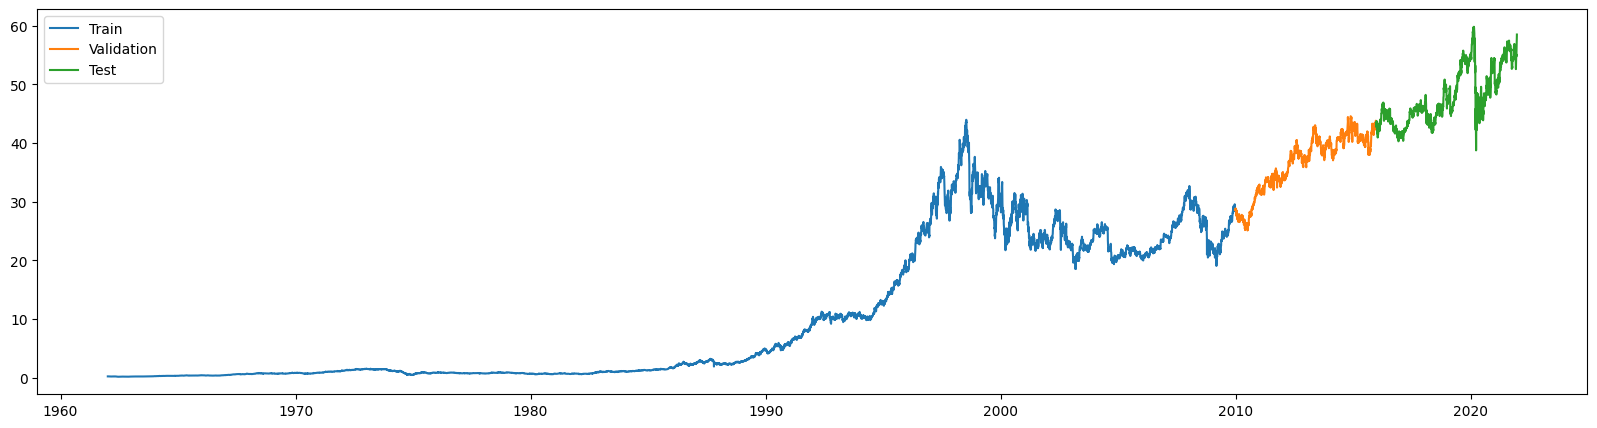

In [90]:
plt.figure(figsize=(20,5))
plt.plot(dates_train, y_train_1)
plt.plot(dates_val, y_val_1)
plt.plot(dates_test, y_test_1)

plt.legend(['Train', 'Validation', 'Test'])

In [91]:

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'],
             )

model.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])

Epoch 1/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 66.7198 - mean_absolute_error: 3.6051 - val_loss: 1.5474 - val_mean_absolute_error: 0.8918
Epoch 2/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0883 - mean_absolute_error: 0.1387 - val_loss: 0.2511 - val_mean_absolute_error: 0.3581
Epoch 3/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0797 - mean_absolute_error: 0.1394 - val_loss: 0.2008 - val_mean_absolute_error: 0.3180
Epoch 4/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0855 - mean_absolute_error: 0.1445 - val_loss: 0.7089 - val_mean_absolute_error: 0.7603
Epoch 5/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0838 - mean_absolute_error: 0.1436 - val_loss: 0.1684 - val_mean_absolute_error: 0.3024
Epoch 6/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0701 - mean_absolute_error: 0.1290 - val_loss: 0.2398 - val_mean_absolute_error: 0.3616
Epoch 7/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0680 - mean_absolute_error: 0.1288 - 

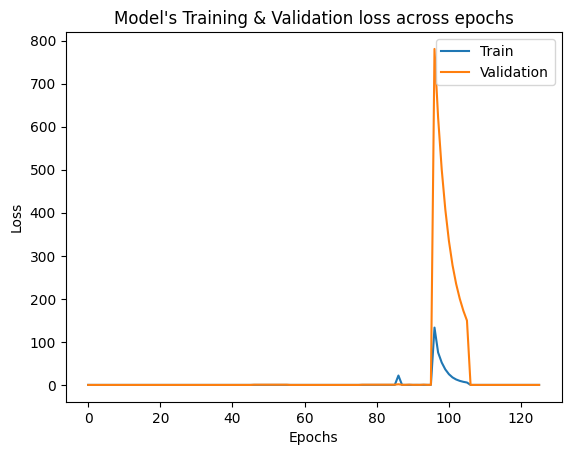

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


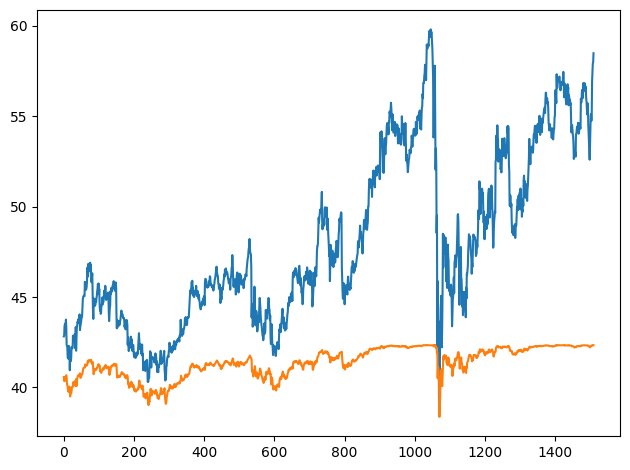

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 4 units 50, SGD 0.001, LOSS mean_squ...",0.286690,-6.758153,0.090577
1,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001, LO...",1.091760,-102.092452,1.203614
2,"LSTM 32, 16, , Adam 0.001, LOSS mean_squared_...",0.073787,0.403977,0.006959
3,"4 LSTM 50, Drop 0.2, Adam 0.001, LOSS mean_sq...",0.060292,0.502265,0.005811
4,"GRU L 4 units 50, Adam 0.001, LOSS mean_square...",1.091760,-102.092452,1.203614
5,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001, LO...",0.062457,0.572830,0.004987
6,"GRU L 4 units 50, Adam 0.001, LOSS mean_square...",1.091760,-102.092452,1.203614
7,"GRU L 4 units 50, Adam 0.001, LOSS mean_square...",0.059280,0.630744,0.004311
8,Data 2LSTM 64,6.570939,-1.643334,59.182751


In [102]:
plotloss(history)
print_result(model, 'Data 2LSTM 64', X_test_1, y_test_1)

Epoch 1/40
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 186.3036 - mean_absolute_error: 8.3660 - mean_squared_error: 186.3048 - val_loss: 872.5330 - val_mean_absolute_error: 29.0205 - val_mean_squared_error: 866.3378
Epoch 2/40
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 98.6160 - mean_absolute_error: 5.5792 - mean_squared_error: 98.6164 - val_loss: 695.9346 - val_mean_absolute_error: 25.8118 - val_mean_squared_error: 690.4031
Epoch 3/40
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 68.6021 - mean_absolute_error: 4.4678 - mean_squared_error: 68.6026 - val_loss: 564.5942 - val_mean_absolute_error: 23.1400 - val_mean_squared_error: 559.6153
Epoch 4/40
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 48.5082 - mean_absolute_error: 3.6251 - mean_squared_error: 48.5085 - val_loss: 460.9767 - val_mean_absolute_error: 20.7924 - val_mean_squared_error: 456.4835
Epoch 5/40
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 33.3119 - mean_absolute_error: 2.8885 - mean_squared_error: 33

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_23 (LSTM)                  │ (None, 3, 32)          │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 3, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_24 (LSTM)                  │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,517 (87.96 KB)

 Trainable params: 7,505 (29.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,012 (58.64 KB)

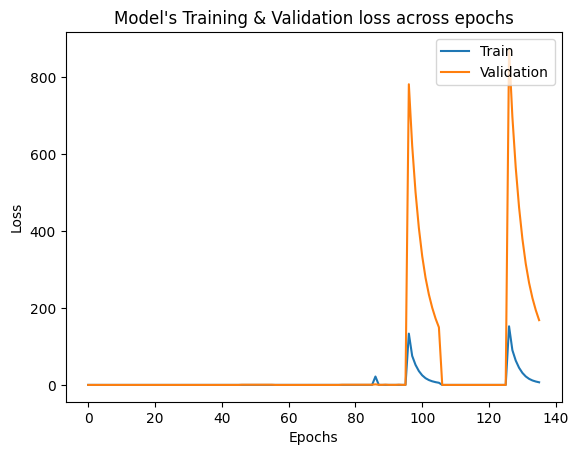

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


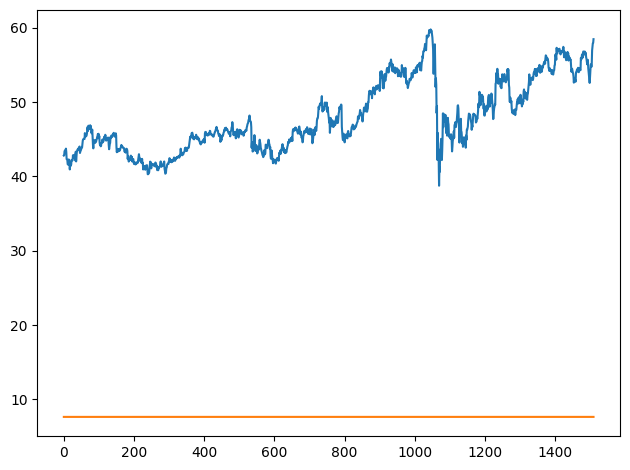

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 4 units 50, SGD 0.001, LOSS mean_squ...",0.286690,-6.758153,0.090577
1,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001, LO...",1.091760,-102.092452,1.203614
2,"LSTM 32, 16, , Adam 0.001, LOSS mean_squared_...",0.073787,0.403977,0.006959
3,"4 LSTM 50, Drop 0.2, Adam 0.001, LOSS mean_sq...",0.060292,0.502265,0.005811
4,"GRU L 4 units 50, Adam 0.001, LOSS mean_square...",1.091760,-102.092452,1.203614
5,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001, LO...",0.062457,0.572830,0.004987
6,"GRU L 4 units 50, Adam 0.001, LOSS mean_square...",1.091760,-102.092452,1.203614
7,"GRU L 4 units 50, Adam 0.001, LOSS mean_square...",0.059280,0.630744,0.004311
8,Data 2LSTM 64,6.570939,-1.643334,59.182751
9,"Data 2 LSTM 32 D0,2 LSTM 16",46.932449,-98.386391,2225.205078


In [104]:

regressorLSTM = tf.keras.Sequential()
regressorLSTM.add(LSTM(32, return_sequences = True,  input_shape = (X_train_1.shape[1],X_train_1.shape[2])))
regressorLSTM.add(Dropout(0.2))
regressorLSTM.add(LSTM(16, return_sequences = False))

regressorLSTM.add(Dense(1,activation="relu"))
regressorLSTM.compile(optimizer = Adam(learning_rate=0.001),loss = 'mean_squared_error',metrics = ["mean_absolute_error",'mean_squared_error'])
regressorLSTM.fit(X_train_1,y_train_1, validation_data=(X_val_1, y_val_1),epochs=40,batch_size=64, 
                  callbacks=[history, early_stopping]
                  )
regressorLSTM.summary()

plotloss(history)
print_result(regressorLSTM, 'Data 2 LSTM 32 D0,2 LSTM 16', X_test_1, y_test_1)
